Необходимо, чтобы ваш градиентный спуск мог решать задачи классификации, а именно линейной классификации и логистической регрессии.
На всякий случай напомню, что код будет разный, поэтому жду от вас две функции градиентного спуска.

In [179]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

In [180]:
# генерируем случайные данные
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

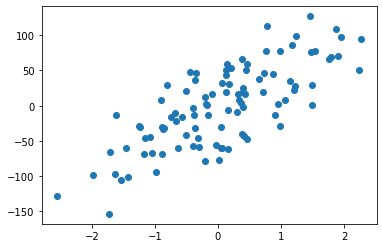

In [181]:
# посмотрим что получилось

pylab.plot(x, y, 'o')
pylab.show()

In [182]:
# размер данных

m, n = np.shape(x)
m, n

(100, 1)

In [183]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[ 1.        , -0.35955316],
       [ 1.        ,  0.97663904],
       [ 1.        ,  0.40234164],
       [ 1.        , -0.81314628],
       [ 1.        , -0.88778575]])

In [184]:
# y лист значений
y[:5]

array([-31.74599395, -28.79914206,  -2.18450294,  28.96679712,
       -30.8791169 ])

In [380]:
# шаг алгоритма
alpha = 0.01

In [383]:
def gradient_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        
        #print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    
    return theta

In [384]:
%%time
theta = gradient_descent_2(alpha, x, y, 1000)

Wall time: 34 ms


In [385]:
theta

array([-2.84837957, 43.20234847])

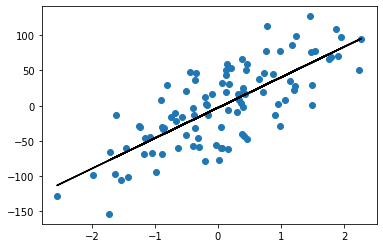

In [386]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
    
# рисуем результат
pylab.plot(x[:,1],y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()

In [190]:
from math import exp
#import decimal

In [531]:
def gradient_descent_log(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis_0 = np.dot(x, theta) # матричное произведение
        loss = 0
        for val in hypothesis_0:
            hypothesis = 1.0/(1.0+exp((-1)*float(val)))#меняем формулу на лог рег. Есть проблемы с переполнением
            loss += ((float(hypothesis) - y))
        #J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        J = np.sum(loss ** 2) #по идеи функция потерь тут такая
        
        #print( "iter %s | J: %.3f" % (iter, J) )
        #print( "iter %s | hypothesis: %.3f" % (iter, hypothesis) )
        
        #gradient = np.dot(x_transpose, loss) / m
        gradient = (1 / m) * np.dot(x_transpose, loss) #думаю что это как то так
        theta = theta - alpha * gradient  # update
        
        #print(sum(loss))
    
    return theta

In [478]:
%%time
alpha = 0.000001
theta = gradient_descent_log(alpha, x, y, 10000)

Wall time: 2.97 s


In [479]:
theta

array([ 0.17551658, 44.83871028])

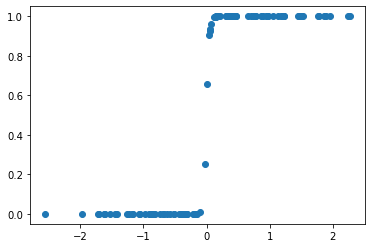

In [480]:
# построим полученную линию из theta
y_predict = []
for i in x: #(x.shape[1])
    #y_predict = theta[0] + theta[1]*x
    y_predict.append(1/(1+exp(-1*(theta[0] + theta[1]*i[1]))))
#print(len(y_predict), len (x))
# рисуем результат
#pylab.plot(x[:,1],y,'o')
pylab.plot(x[:,1],y_predict,'o') #k-
pylab.show()

In [412]:
y_predict[0], y[0], theta, x[0], 

(1.1864144045189098e-07,
 -31.745993948575236,
 array([ 0.1747231 , 44.83866282]),
 array([ 1.        , -0.35955316]))

In [481]:
#https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/logistic_regression/logistic_regression.py
#https://www.machinelearningmastery.ru/implement-logistic-regression-stochastic-gradient-descent-scratch-python/

In [ ]:
#Посмотрим готовые решения

In [510]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import preprocessing

In [511]:
model = LogisticRegression()


In [512]:
lab_enc = preprocessing.LabelEncoder()
y_1 = lab_enc.fit_transform(y)

In [513]:
model.fit( x, y_1 )
predictions = model.predict_proba( x )

In [514]:
model.score(x, y_1)

0.05

In [515]:
#да точности вообще нет.
#но это как то и норма, так как по факту лог регрессия для классификационных задач, а тут совершенно другие данные

In [528]:
model_1 = linear_model.SGDRegressor( alpha = 0.000001, max_iter = 10000#,learning_rate="constant",penalty = None,eta0=1
                                   )

In [529]:
model_1.fit( x, y_1 )

SGDRegressor(alpha=1e-06, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [530]:
model_1.intercept_, model_1.coef_

(array([24.12669466]), array([24.1265508 , 21.13612629]))